In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

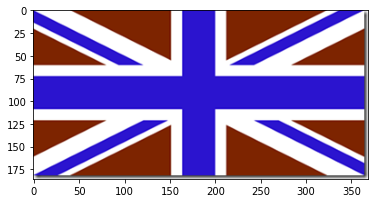

In [2]:
img = cv2.imread("image_thumb[2].jpg")
plt.imshow(img)

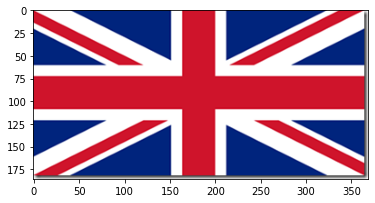

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
h, w = img.shape[:2]
print(f'resolusi citra {w}x{h}')

resolusi citra 369x186


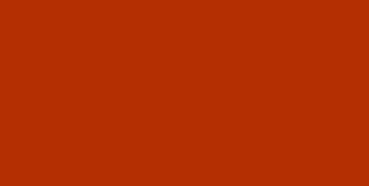

In [6]:
new_img = np.zeros([h, w, 3], dtype = 'uint8')

for y in range(h):
  for x in range(w):
    new_img[y, x] = [0, 48, 180] # ngebuat warna dengan format BGR

cv2_imshow(new_img)

(186, 369)


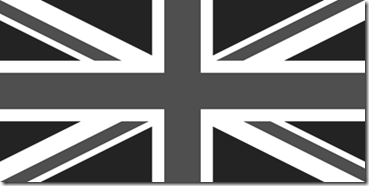

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray_img.shape)
cv2_imshow(gray_img)


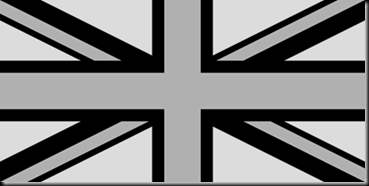

In [8]:
negative_img = np.zeros([h, w], dtype = 'uint8')

for y in range(h):
  for x in range(w):
    pix = gray_img[y, x]
    negative_img[y, x] = 256 - 1 - pix 

cv2_imshow(negative_img)
# cv2_imshow(negative_img, cmap = 'gray')

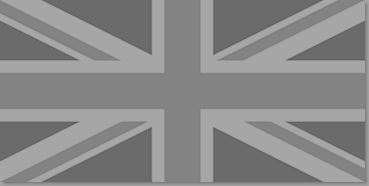

In [18]:
trans_log_img = np.zeros([h, w], dtype = 'uint8')

for y in range(h):
  for x in range(w):
    pix = gray_img[y, x]
    val = 30 * np.log(1 + pix)
    if val > 255:
      val = 255
    if val < 0:
      val = 0
    trans_log_img[y, x] = val

cv2_imshow(trans_log_img)

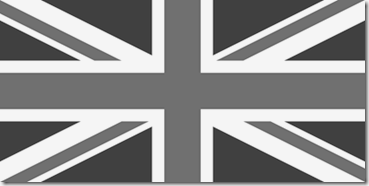

In [29]:
powlaw_log_img = np.zeros([h, w], dtype = 'uint8')

for y in range(h):
  for x in range(w):
    pix = gray_img[y, x]
    val = 6 * np.power(pix, 0.67)
    if val > 255:
      val = 255
    if val < 0:
      val = 0
    powlaw_log_img[y, x] = val

cv2_imshow(powlaw_log_img)

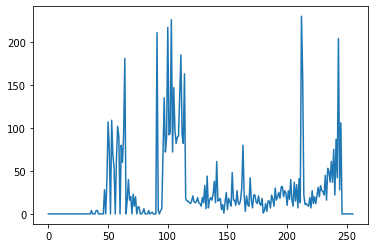

In [35]:
hist = np.zeros([256], dtype='uint8')

for y in range(h):
  for x in range(w):
    pix = powlaw_log_img[y, x]
    hist[pix] += 1

plt.plot(hist)

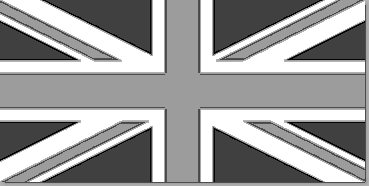

In [40]:
hist_eq_img = cv2.equalizeHist(powlaw_log_img)
cv2_imshow(hist_eq_img)

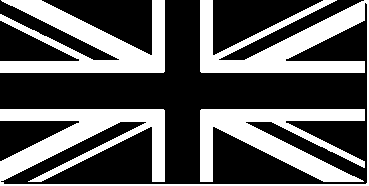

In [39]:
(thresh, threst_img) = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(threst_img)

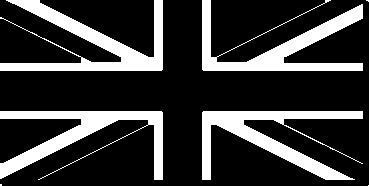

In [41]:
kernel = np.ones((5, 5 ), np.uint8)
erode_img = cv2.erode(threst_img, kernel)
cv2_imshow(erode_img)

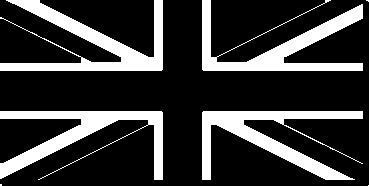

In [42]:
kernel = np.ones((5, 5 ), np.uint8)
dilate_img = cv2.dilate(threst_img, kernel)
cv2_imshow(erode_img)